In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('acs_ny.csv')

In [3]:
import seaborn as sns

We are going to find out outliers using the Tukey boxplots idea.

Tukey boxplots use Q1-1.5IQR and Q3+1.5IQR formula to calculate outlier.

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

[]

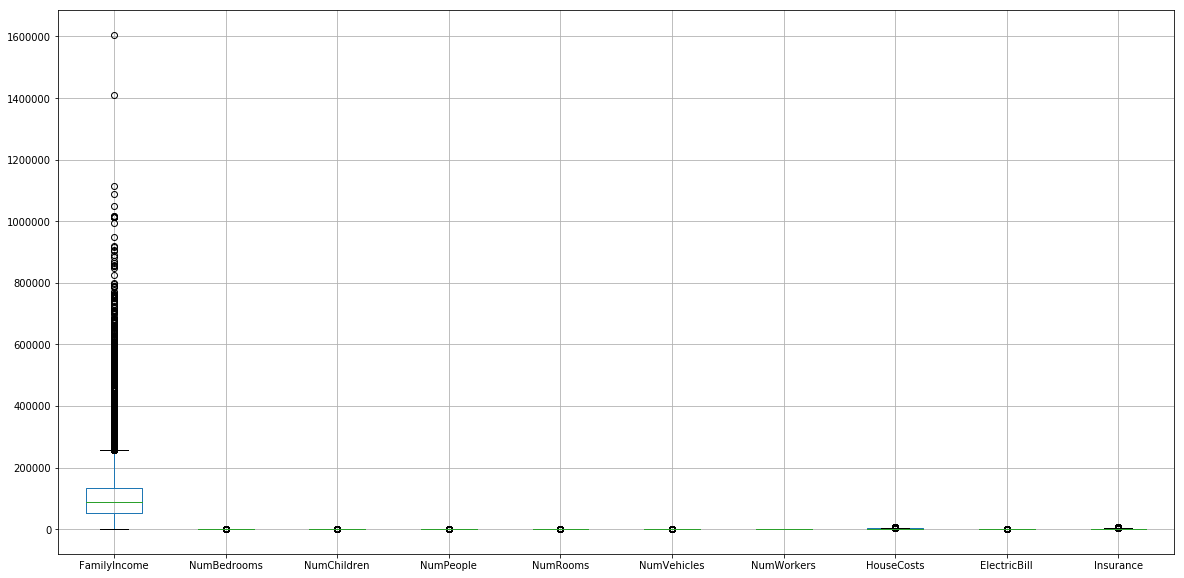

In [5]:
data.boxplot(return_type = 'dict')
plt.plot()

We do not want the dependent variable. So, we make a boxplot again by only using independent variables.

In [6]:
x = data.iloc[:, 2:]
#We separated Family Income. Let us make a box plot using independent variables only.

[]

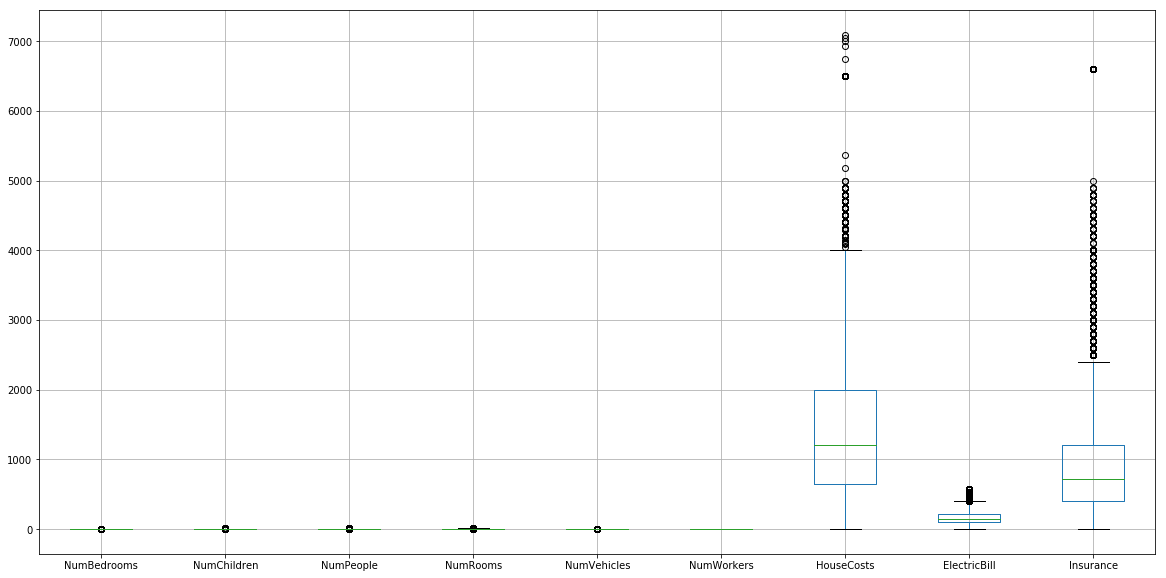

In [7]:
x.boxplot(return_type = 'dict')
plt.plot()

Now, we can see the potential outliers.

The numeric variables with possible outliers are HouseCosts, ElectricBill and Insurance.

There might be more outliers overshadowed by HoouseCosts and Insurance. We will deal with them later. 

In [8]:
#Let us analyze HouseCosts first.
#House Costs > 4000 are possible outliers.
out_1 = x['HouseCosts']
x_outlier_1 = (out_1 > 4000)
data[x_outlier_1]

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
108,10-Jan,13000,Married,4,0,2,10,Single detached,2,1,Mortgage,2000-2004,4300,200,No,Oil,2000,English
1382,10-Jan,57000,Married,2,0,3,4,Single detached,3,1,Mortgage,1970-1979,6500,150,No,Oil,1500,English
1401,10-Jan,57600,Married,5,0,3,9,Single detached,3,2,Mortgage,Before 1939,6500,230,No,Wood,0,English
1831,10-Jan,68800,Married,2,0,2,4,Single detached,3,2,Mortgage,1970-1979,6500,100,No,Oil,1200,Other European
1837,10-Jan,68800,Married,5,0,3,11,Single detached,3,2,Mortgage,2000-2004,6500,400,No,Gas,760,English
1916,10-Jan,70800,Married,8,2,6,21,Single detached,3,3,Mortgage,1970-1979,6500,300,No,Oil,6600,English
1967,10-Jan,72000,Married,4,3,5,8,Single detached,3,1,Mortgage,2005,4100,160,No,Oil,800,Spanish
1968,10-Jan,72000,Married,4,3,5,11,Single detached,2,1,Mortgage,2000-2004,6500,400,No,Oil,4000,English
2082,10-Jan,75500,Female Head,4,0,4,9,Single detached,4,3,Mortgage,1950-1959,6500,250,No,Oil,3000,English
2216,10-Jan,79100,Married,4,0,2,8,Single detached,2,0,Mortgage,1990-1999,6500,300,No,Gas,6600,English


In [9]:
#To find outliers
Q1 = x['HouseCosts'].quantile(0.25)
Q3 = x['HouseCosts'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
out_1 = x['HouseCosts']
x_outlier = (out_1 < lower_bound) | (out_1 > upper_bound) #writing "or" does not work
data[x_outlier]

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
108,10-Jan,13000,Married,4,0,2,10,Single detached,2,1,Mortgage,2000-2004,4300,200,No,Oil,2000,English
1382,10-Jan,57000,Married,2,0,3,4,Single detached,3,1,Mortgage,1970-1979,6500,150,No,Oil,1500,English
1401,10-Jan,57600,Married,5,0,3,9,Single detached,3,2,Mortgage,Before 1939,6500,230,No,Wood,0,English
1831,10-Jan,68800,Married,2,0,2,4,Single detached,3,2,Mortgage,1970-1979,6500,100,No,Oil,1200,Other European
1837,10-Jan,68800,Married,5,0,3,11,Single detached,3,2,Mortgage,2000-2004,6500,400,No,Gas,760,English
1916,10-Jan,70800,Married,8,2,6,21,Single detached,3,3,Mortgage,1970-1979,6500,300,No,Oil,6600,English
1967,10-Jan,72000,Married,4,3,5,8,Single detached,3,1,Mortgage,2005,4100,160,No,Oil,800,Spanish
1968,10-Jan,72000,Married,4,3,5,11,Single detached,2,1,Mortgage,2000-2004,6500,400,No,Oil,4000,English
2082,10-Jan,75500,Female Head,4,0,4,9,Single detached,4,3,Mortgage,1950-1959,6500,250,No,Oil,3000,English
2216,10-Jan,79100,Married,4,0,2,8,Single detached,2,0,Mortgage,1990-1999,6500,300,No,Gas,6600,English


Let's make a program out of this:

In [10]:
def find_outlier(column_name_with_apostrophe):
    Q1 = x[column_name_with_apostrophe].quantile(0.25)
    Q3 = x[column_name_with_apostrophe].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_1 = x[column_name_with_apostrophe]
    x_outlier = (out_1 < lower_bound) | (out_1 > upper_bound) #writing "or" does not work
    return data[x_outlier] 

In [11]:
find_outlier('HouseCosts')

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
108,10-Jan,13000,Married,4,0,2,10,Single detached,2,1,Mortgage,2000-2004,4300,200,No,Oil,2000,English
1382,10-Jan,57000,Married,2,0,3,4,Single detached,3,1,Mortgage,1970-1979,6500,150,No,Oil,1500,English
1401,10-Jan,57600,Married,5,0,3,9,Single detached,3,2,Mortgage,Before 1939,6500,230,No,Wood,0,English
1831,10-Jan,68800,Married,2,0,2,4,Single detached,3,2,Mortgage,1970-1979,6500,100,No,Oil,1200,Other European
1837,10-Jan,68800,Married,5,0,3,11,Single detached,3,2,Mortgage,2000-2004,6500,400,No,Gas,760,English
1916,10-Jan,70800,Married,8,2,6,21,Single detached,3,3,Mortgage,1970-1979,6500,300,No,Oil,6600,English
1967,10-Jan,72000,Married,4,3,5,8,Single detached,3,1,Mortgage,2005,4100,160,No,Oil,800,Spanish
1968,10-Jan,72000,Married,4,3,5,11,Single detached,2,1,Mortgage,2000-2004,6500,400,No,Oil,4000,English
2082,10-Jan,75500,Female Head,4,0,4,9,Single detached,4,3,Mortgage,1950-1959,6500,250,No,Oil,3000,English
2216,10-Jan,79100,Married,4,0,2,8,Single detached,2,0,Mortgage,1990-1999,6500,300,No,Gas,6600,English


What I am trying to do here is that I am trying to find out the index values of the outliers and see if they all have one common index so I can remove them.

In [12]:
HouseCosts_index = list(find_outlier('HouseCosts').index.values)
ElectricBill_index = list(find_outlier('ElectricBill').index.values)
Insurance_index = list(find_outlier('Insurance').index.values)
NumWorkers_index = list(find_outlier('NumWorkers').index.values)
NumVehicles_index = list(find_outlier('NumVehicles').index.values)
NumRooms_index = list(find_outlier('NumRooms').index.values)
NumPeople_index = list(find_outlier('NumPeople').index.values)
NumChildren_index = list(find_outlier('NumChildren').index.values)
NumBedrooms_index = list(find_outlier('NumBedrooms').index.values)

In [13]:
print("Length of HouseCosts_index", len(HouseCosts_index))
print("Length of ElectricBill_index", len(ElectricBill_index))
print("Length of Insurance_index", len(Insurance_index))
print("Length of NumWorkers_index", len(NumWorkers_index))
print("Length of NumVehicles_index", len(NumVehicles_index))
print("Length of NumRooms_index", len(NumRooms_index))
print("Length of NumPeople_index", len(NumPeople_index))
print("Length of NumChildren_index", len(NumChildren_index))
print("Length of NumBedrooms_index", len(NumBedrooms_index))

Length of HouseCosts_index 654
Length of ElectricBill_index 826
Length of Insurance_index 1394
Length of NumWorkers_index 0
Length of NumVehicles_index 1290
Length of NumRooms_index 769
Length of NumPeople_index 311
Length of NumChildren_index 76
Length of NumBedrooms_index 882


In [14]:
#Let us check the total number of rows we have with us.
# data.info()
#We have 22,744 rows.
(1394 / 22744) * 100
# 1394 is about 6% of our data.

6.12908899050299

In [15]:
#Let us check if any of them come from same index
# what I decided to do is i am going to combine all of them in a new list and take out the values with how many times they occur.
New_list = HouseCosts_index + ElectricBill_index + Insurance_index + NumWorkers_index + NumVehicles_index + NumRooms_index + NumPeople_index+ NumChildren_index+ NumBedrooms_index

In [16]:
len(New_list)

6202

In [17]:
#If we decide to drop everything, that would be about 27%.
(6202 / 22744) * 100

27.26873021456208

In [18]:
df = pd.DataFrame(New_list, columns = ['New_list'])

In [19]:
#Here we find out the indexes which have the most outliers. We will actually make a different DataFrame for them instead of deleting them
#incase we want to do some wrangling with it.
# So, we had 9 columns where we had outliers. 5 is the maximum value we have.
# I decided to take out all of these indexes from the Data and try doing Multiple Regression to see if anything changed.
#27 % is a lot, but we are doing it for research.
df['New_list'].value_counts()

21671    5
18793    5
20033    5
4509     5
4434     5
21250    5
18412    5
4202     5
13936    5
13121    5
21393    5
21975    5
19105    5
21304    4
4418     4
20374    4
4348     4
4605     4
14573    4
1916     4
4472     4
21527    4
19440    4
21422    4
19596    4
4400     4
18244    4
4608     4
4621     4
4510     4
        ..
11175    1
17406    1
17370    1
13308    1
21307    1
15353    1
21492    1
19443    1
9536     1
3047     1
17382    1
11307    1
21476    1
7137     1
15325    1
17284    1
17322    1
5076     1
978      1
21456    1
1720     1
21452    1
18328    1
15301    1
17181    1
954      1
7093     1
22197    1
13228    1
0        1
Name: New_list, Length: 4549, dtype: int64

In [20]:
#Since some variables were the same, total index to be removed came down to 20%
(4549 / 22744) * 100

20.000879352796343

In [21]:
Indexes_to_pop = list(set(New_list))

In [22]:
#I am now going to write a program that will make a new DataFrame for the outliers and remove them from the data DataFrame because we need y too.
outlier_df = []
for i in Indexes_to_pop:
    outlier_df.append(data.iloc[i])

In [23]:
Outlier_DF = pd.DataFrame(outlier_df)

In [24]:
#we remove the indexes now.
for i in Indexes_to_pop:
    data = data.drop(i)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18196 entries, 1 to 22743
Data columns (total 18 columns):
Acres           18196 non-null object
FamilyIncome    18196 non-null int64
FamilyType      18196 non-null object
NumBedrooms     18196 non-null int64
NumChildren     18196 non-null int64
NumPeople       18196 non-null int64
NumRooms        18196 non-null int64
NumUnits        18196 non-null object
NumVehicles     18196 non-null int64
NumWorkers      18196 non-null int64
OwnRent         18196 non-null object
YearBuilt       18196 non-null object
HouseCosts      18196 non-null int64
ElectricBill    18196 non-null int64
FoodStamp       18196 non-null object
HeatingFuel     18196 non-null object
Insurance       18196 non-null int64
Language        18196 non-null object
dtypes: int64(10), object(8)
memory usage: 2.6+ MB


In [27]:
new_data = pd.DataFrame(data)

In [28]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18196 entries, 1 to 22743
Data columns (total 18 columns):
Acres           18196 non-null object
FamilyIncome    18196 non-null int64
FamilyType      18196 non-null object
NumBedrooms     18196 non-null int64
NumChildren     18196 non-null int64
NumPeople       18196 non-null int64
NumRooms        18196 non-null int64
NumUnits        18196 non-null object
NumVehicles     18196 non-null int64
NumWorkers      18196 non-null int64
OwnRent         18196 non-null object
YearBuilt       18196 non-null object
HouseCosts      18196 non-null int64
ElectricBill    18196 non-null int64
FoodStamp       18196 non-null object
HeatingFuel     18196 non-null object
Insurance       18196 non-null int64
Language        18196 non-null object
dtypes: int64(10), object(8)
memory usage: 2.6+ MB


In [29]:
new_data.to_csv('new_data.csv')